Remote sensing image exploration using python
## Prepared by: Md Kamrul Islam

For convaniance of installing packages I worked in google collab# This file contains basic raster images visualizatio and its information derivation using python coding. 

In [1]:
## Conneting my google drive with colab
import os, glob
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Installing rasterio libarary and importing other packages

In [3]:
!pip install rasterio
import rasterio
import numpy as np
from rasterio.plot import show
from matplotlib import pyplot as plt

In [4]:
##opening my raster image( I have used landsat 8 image which is a 7 band raster image
image = rasterio.open("/content/drive/MyDrive/Colabfolder/MainImage.tif")

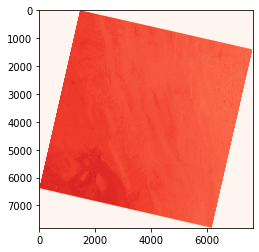

In [5]:
## Let's visualize the image# we can open any band one by one, or multiple bands(3 bands) as a composite image. For now let's visualize band 3 with red color
plt.imshow(image.read(2), cmap='Reds')

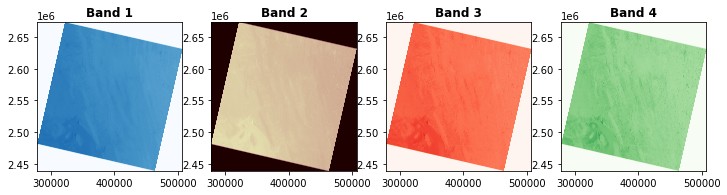

In [6]:
## We can aslo plot Muliple image togather 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,3))

show((image, 1), ax=ax1, cmap='Blues', title='Band 1')
show((image, 2), ax=ax2, cmap='pink', title='Band 2')
show((image, 3), ax=ax3, cmap='Reds', title='Band 3')

show((image, 4), ax=ax4, cmap='Greens', title='Band 4')

plt.show()

**Let's Read information of the image**

In [ ]:
# Geeting Projection information
image.crs

CRS.from_epsg(32646)

In [ ]:
image.bounds # georeferrances

BoundingBox(left=277785.0, bottom=2438985.0, right=507315.0, top=2673015.0)

In [ ]:
image.count # Number of Bands

7

In [ ]:
image.meta ## Meta data

{'count': 7,
 'crs': CRS.from_epsg(32646),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 7801,
 'nodata': 0.0,
 'transform': Affine(30.0, 0.0, 277785.0,
       0.0, -30.0, 2673015.0),
 'width': 7651}

Now let's have a compostive image of 3 bands 

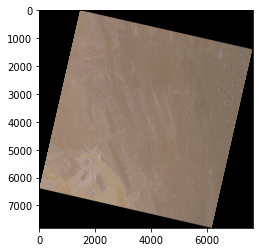

In [ ]:

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)
# Convert to numpy arrays
blue = image.read(2)
green = image.read(3)
red = image.read(4)

# Normalize band DN
blue_nrml = normalize(blue)
green_nrml = normalize(green)
red_nrml = normalize(red)

# Stack bands
blgnrd = np.dstack((blue_nrml, green_nrml, red_nrml))

# View the color composite
plt.imshow(blgnrd)

In [ ]:
## Now create a histogram of Band wise DN value distribution

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


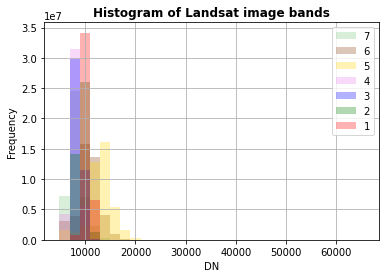

In [ ]:
from enum import auto
from rasterio.plot import show_hist
show_hist(image, bins=30, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram of Landsat image bands")